## 2장 신경망 구성 요소

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 데이터 준비 : get_data 함수는 입출력 데이터를 담는 텐서를 생성한다.

스칼라(0차원 텐서)

In [ ]:
x = torch.rand(10)
x.size()

torch.Size([10])

벡터(1차원 텐서)

In [ ]:
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

행렬(2차원 텐서)

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_tensor = torch.from_numpy(boston.data)

boston_tensor.size()

torch.Size([506, 13])

In [ ]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

3차원 텐서

In [ ]:
from PIL import Image
# PIL 라이브러리를 사용해 디스크에서 판다 이미지를 읽고 numpy 배열로 변환
panda = np.array(Image.open('/content/drive/MyDrive/tensor/data/panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

torch.Size([224, 224, 3])

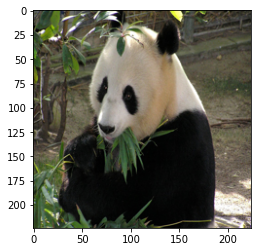

In [ ]:
plt.imshow(panda)

텐서 슬라이싱

In [ ]:
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])
sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [ ]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

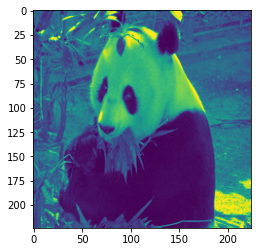

In [ ]:
plt.imshow(panda_tensor[:,:,0].numpy())

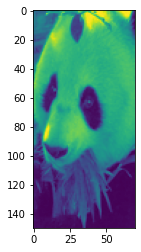

In [ ]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy())

Tensor에서 특정 요소 가져오기

In [ ]:
#torch.eye(shape) produces an diagonal matrix with 1 as it diagonal #elements.
#torch.eye(shape) 는 대각 행렬을 만들고, 대각선 요소를 1로 채움
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

4차원 텐서

4차원 텐서 타입을 사용하는 대표적인 예는 이미지 배치다.  
최신 CPI와 GPU는 여러 데이터에 같은 작업을 수행할 때 더 빨리 처리하도록 최적화돼 있다. (이미지 1개 처리시간과 몇 장의 이미지를 연속으로 처리하는 시간은 비슷함)  
따라서 한 번에 1개 이미지를 처리하는 방식보다 여러 이미지를 배치로 묶어 처리하는 방식이 더 일반적이다.  
배치 크기는 여러 가지 요소에 영향을 받기 때문에 배치 크기를 결정하는 것은 간단하지 않다.  
큰 배치 크기 또는 데이터셋 전체 사용에 대한 가장 중요한 제약은 GPU 메모리의 크기다.  
일반적으로 사용되는 배치 크기는 16, 32, 64다

In [ ]:
from glob import glob
#디스크에서 고양이 이미지 읽기
data_path='/Users/vishnu/Documents/fastAIPytorch/fastai/courses/dl1/data/dogscats/train/cats/'
cats = glob(data_path+'*.jpg')
#Convert images into numpy arrays
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224))) for cat in
cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensors.size()

torch.Size([0, 224, 224, 3])

5차원 텐서

5차원 텐서를 사용하는 일반적인 예는 동영상 데이터다. 동영상 데이터는 프레임으로 분할된다. 예를 들어, 판다의 동영상이 30개의 프레임을 갖는다면, 이 동영상 데이터는 형상이 (1 x 30 x 244 x 244 x 3)이다.

GPU 지원 Tensor

Tensor 형태의 데이터를 갖고 일반적으로 수행하는 연산은 덧셈, 뺄셈, 곱셈, 내적과 행렬 곱이다. 이러한 연산은 CPU와 GPU 모두에서 수행될 수 있다. 파이토치는 cuda()라는 함수를 제공한다. 이 함수는 CPU에서 동작하는 Tensor객체를 복사해 GPU에서 동작하는 Tensor객체를 새로 만든다.

In [ ]:
#Tensor 덧셈
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a+b
d = torch.add(a,b)

In [ ]:
c

tensor([[1.6018, 0.8632],
        [0.9688, 1.4329]])

In [ ]:
d

tensor([[1.6018, 0.8632],
        [0.9688, 1.4329]])

In [ ]:
#인라인 곱셈
a.add_(5)

tensor([[5.8397, 5.4081],
        [5.1731, 5.6506]])

In [ ]:
# 다른 Tensor와 곱셈
a*b

tensor([[4.4506, 2.4612],
        [4.1166, 4.4208]])

In [ ]:
a.mul(b)

tensor([[4.4506, 2.4612],
        [4.1166, 4.4208]])

In [ ]:
# 인라인 곱셈
a.mul_(b)

tensor([[4.4506, 2.4612],
        [4.1166, 4.4208]])

GPU동작하는 곱셈

In [ ]:
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)
a.matmul(b)

tensor([[2490.5234, 2482.5593, 2502.5713,  ..., 2489.3977, 2490.6123,
         2517.9094],
        [2463.9705, 2465.0940, 2491.5356,  ..., 2474.4348, 2487.9365,
         2495.4258],
        [2509.9355, 2487.1567, 2530.3157,  ..., 2515.9919, 2515.5251,
         2539.6206],
        ...,
        [2512.3042, 2486.9285, 2504.0872,  ..., 2516.1587, 2487.4934,
         2516.7925],
        [2504.7542, 2479.6143, 2499.0166,  ..., 2500.9512, 2500.3528,
         2525.8323],
        [2482.6858, 2448.4146, 2511.3396,  ..., 2485.7065, 2470.7590,
         2491.7930]])

In [ ]:
#cpu용 텐서 객체를 gpu 텐서로 변환
a = a.cuda()
b= b.cuda()
a.matmul(b)

tensor([[2490.5256, 2482.5540, 2502.5671,  ..., 2489.4014, 2490.6091,
         2517.9106],
        [2463.9717, 2465.0940, 2491.5298,  ..., 2474.4380, 2487.9385,
         2495.4209],
        [2509.9370, 2487.1572, 2530.3184,  ..., 2515.9912, 2515.5205,
         2539.6196],
        ...,
        [2512.3074, 2486.9312, 2504.0833,  ..., 2516.1597, 2487.5005,
         2516.7905],
        [2504.7539, 2479.6187, 2499.0120,  ..., 2500.9497, 2500.3574,
         2525.8308],
        [2482.6855, 2448.4199, 2511.3406,  ..., 2485.7065, 2470.7510,
         2491.7944]], device='cuda:0')

variable

일반적으로 딥러닝 알고리즘은 계산 그래프로 표현된다.

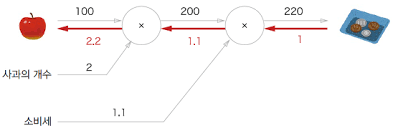

출처 : https://excelsior-cjh.tistory.com/171

각 원은 variable 객체를 나타낸다.
각 변수는 Tensor 객체, 기울기(gradients)와 해당 Variable을 생성하는 함수의 참조를 감싸는 형태의 래퍼클래스다.

variable의 grad는 여러 파라미터(W,b)에 대해 오차 함수(loss function)의 변화율을 나타낸다. 변수 a의 기울기가 2라면, 변수 a값의 변화는 변수 Y에 2배 크기로 반영될 것이다.

In [ ]:
from torch.autograd import Variable

In [ ]:
x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()

y.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

variable객체의 grad초기값은 None이다.  
grad_fn 은 자신을 생성한 함수를 참조한다.  
사용자가 직접 생성한 변수에서 grad_fn이 가리키는 함수 참조는 None이고, 변수 y의 경우 grad_fn이 지정하는 함수 참조는 MeanBackward이다.

In [ ]:
print(x.grad_fn)

None


In [ ]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
y.grad_fn

### 신경망에 사용한 데이터 생성하기 

첫 신경망 코드에서 get_data함수는 변수 2개를 생성한다. 함수 get_data가 생성하는 변수 x와 y의 크기는 각각 (17,1)과 (17)이다.

In [ ]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

### 학습 파라미터 생성

예제로 사용하는 신경망은 학습 파라미터로 W와 b로 구성되고 고정파라미터로 x와 y로 구성된다.

In [ ]:
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad=True)
    return w,b

### 신경망 모델

In [ ]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

In [ ]:
import torch.nn as nn
f = nn.Linear(17,1) # Much simpler.
f

Linear(in_features=17, out_features=1, bias=True)

### 오차 함수 구현

처음에 학습 파라미터 w와 b는 임의의 값으로 초기화되기 때문에 결과인 y_pred와 실제 y값의 차이는 상당히 클 것이다. 따라서 모델의 예측값이 실제 값이 얼마나 가까운지 평가하는 함수가 필요하다.

In [ ]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

오차를 계산하는 과정에서 backward 메서드를 호출했다. backward는 학습 파라미터 w와 b의 변화 정도를 기울기로 계산한다. 오차 함수를 한 번 이상 호출해야 한다면, grad.data_zero_()를 호출해 앞에서 계산했던 기울기를 먼저 제거해야 한다.


### 신경망 최적화

임의의 가중치로 시작해 목푯값을 예측하고 알고리즘의 오차를 계산했다. 최종 loss 변수의 backward 함수를 호출해 기울기를 계산했다. 이 프로세스는 한 에폭(eoph), 다시 말해 전체 데이터셋에 대해 반복된다.  
대부분 딥러닝 실제 사례에서 전체 데이터셋은 작은 데이터셋으로 분할돼 반복적으로 처리되며, 이 반복 처리별로 최적화가 수행된다.

학습률은 대표적인 하이퍼파라미터로, 학습 파라미터의 값을 조정할 때 사용하는 기울기의 적용 비율이다. 여기서 기울기는 각 학습 파라미터를 조정하는 크기와 방향을 나타낸다.

전체 학습 데이터를 모두 학습한 것을 epoch이라고 한다.

In [ ]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

### 데이터 로딩

딥러닝 알고리즘에 사용할 데이터 준비 자체가 상당히 복잡한 작업이다. 파이토치는 멀치 스레딩을 통한 데이터 병렬화, 데이터 증식 및 배치 처리와 같은 여러 복잡한 작업을 추상화하는 여러 유틸리티 클래스를 제공한다.

#### 데이터셋 클래스

사용자 정의 데이터셋 클래스 만들기 위해서는 Dataset 클래스를 상속하고, __len__(self)와 __getitem(self,idx) 메서드를 구현해야 한다.

In [ ]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

- 사용자 정의 데이터셋 클래스에 테이블 인덱스 읽기와 이미지 파일명 읽기와 같은 초기화 작업이 필요하다면, 이러한 로직은 __init__ 메서드에 구현한다.

- __len__(self) 메서드는 데이터셋의 최대 요소 수를 반환한다.( 데이터셋의 총 데이터 수)

- __getitem__(self,idx) 메서드는 데이터셋에 idx 번째 해당 요소를 반환한다. ( 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환, torch.data형식으로 반환)


In [ ]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

for image, label in dogsdset:
 데이터셋에 딥러닝 적용

#### DataLoader 클래스

DataLoader 클래스는 파이토치의 utils 모듈에 위치한다. 이 객체는 SequentialSampler, RandomSampler와 같은 다양한 샘플러와 함께 데이터셋 객체를 결합해 만든다. DataLoader객체는 단일 프로세스 반복자 또는 다중 프로세스 반복자를 위한 배치 이미지를 제공한다.

In [ ]:
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
#for imgs , labels in dataloader:
#학습 데이터셋에 딥러닝 네트워크 적용
#    pass

dataloader를 통해 dataset의 전체 데이터가 batch size로 slice된다. 앞서 만들었던 dataset을 input으로 넣어주면 여러 옵션(데이터 묶기, 섞기, 알아서 병렬처리)을 통해 batch를 만들어준다. 서버에서 돌릴 때는 num_worker를 조절해서 load속도를 올릴 수 있지만, PC에서는 default로 설정해야 오류가 안난다.

- batch_size = 2 : 각 mini batch의 크기

- shuffle = True : Epoch마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꿈

- 